In [20]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import os
os.chdir('..')  # Changes the working directory to the parent directory
import numpy as np
import pandas as pd
import seaborn as sns
from main import quali_data_2018_2023
from main import dataframes_quali
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
import plotly.offline as pyo


In [6]:
df_2018_quali = dataframes_quali[2018]

### Exploration and anaylsis of the quali_data_2018-2023

##### Here we will explore the quali_data_2018-2023 to understand the distribution of the data.

         qualifyId       raceId     driverId  constructorId       number  \
count  2297.000000  2297.000000  2297.000000    2297.000000  2297.000000   
mean   8702.768394  1048.149761   676.970832      77.609926    27.362647   
std     677.398129    35.398998   322.401886      87.087526    24.593196   
min    7540.000000   989.000000     1.000000       1.000000     1.000000   
25%    8114.000000  1017.000000   815.000000       4.000000     9.000000   
50%    8705.000000  1046.000000   832.000000      10.000000    20.000000   
75%    9298.000000  1079.000000   844.000000     131.000000    44.000000   
max    9872.000000  1110.000000   858.000000     214.000000    99.000000   

       quali_position  
count     2297.000000  
mean        10.488028  
std          5.761745  
min          1.000000  
25%          5.000000  
50%         10.000000  
75%         15.000000  
max         20.000000  


C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='q3', ylabel='Count'>

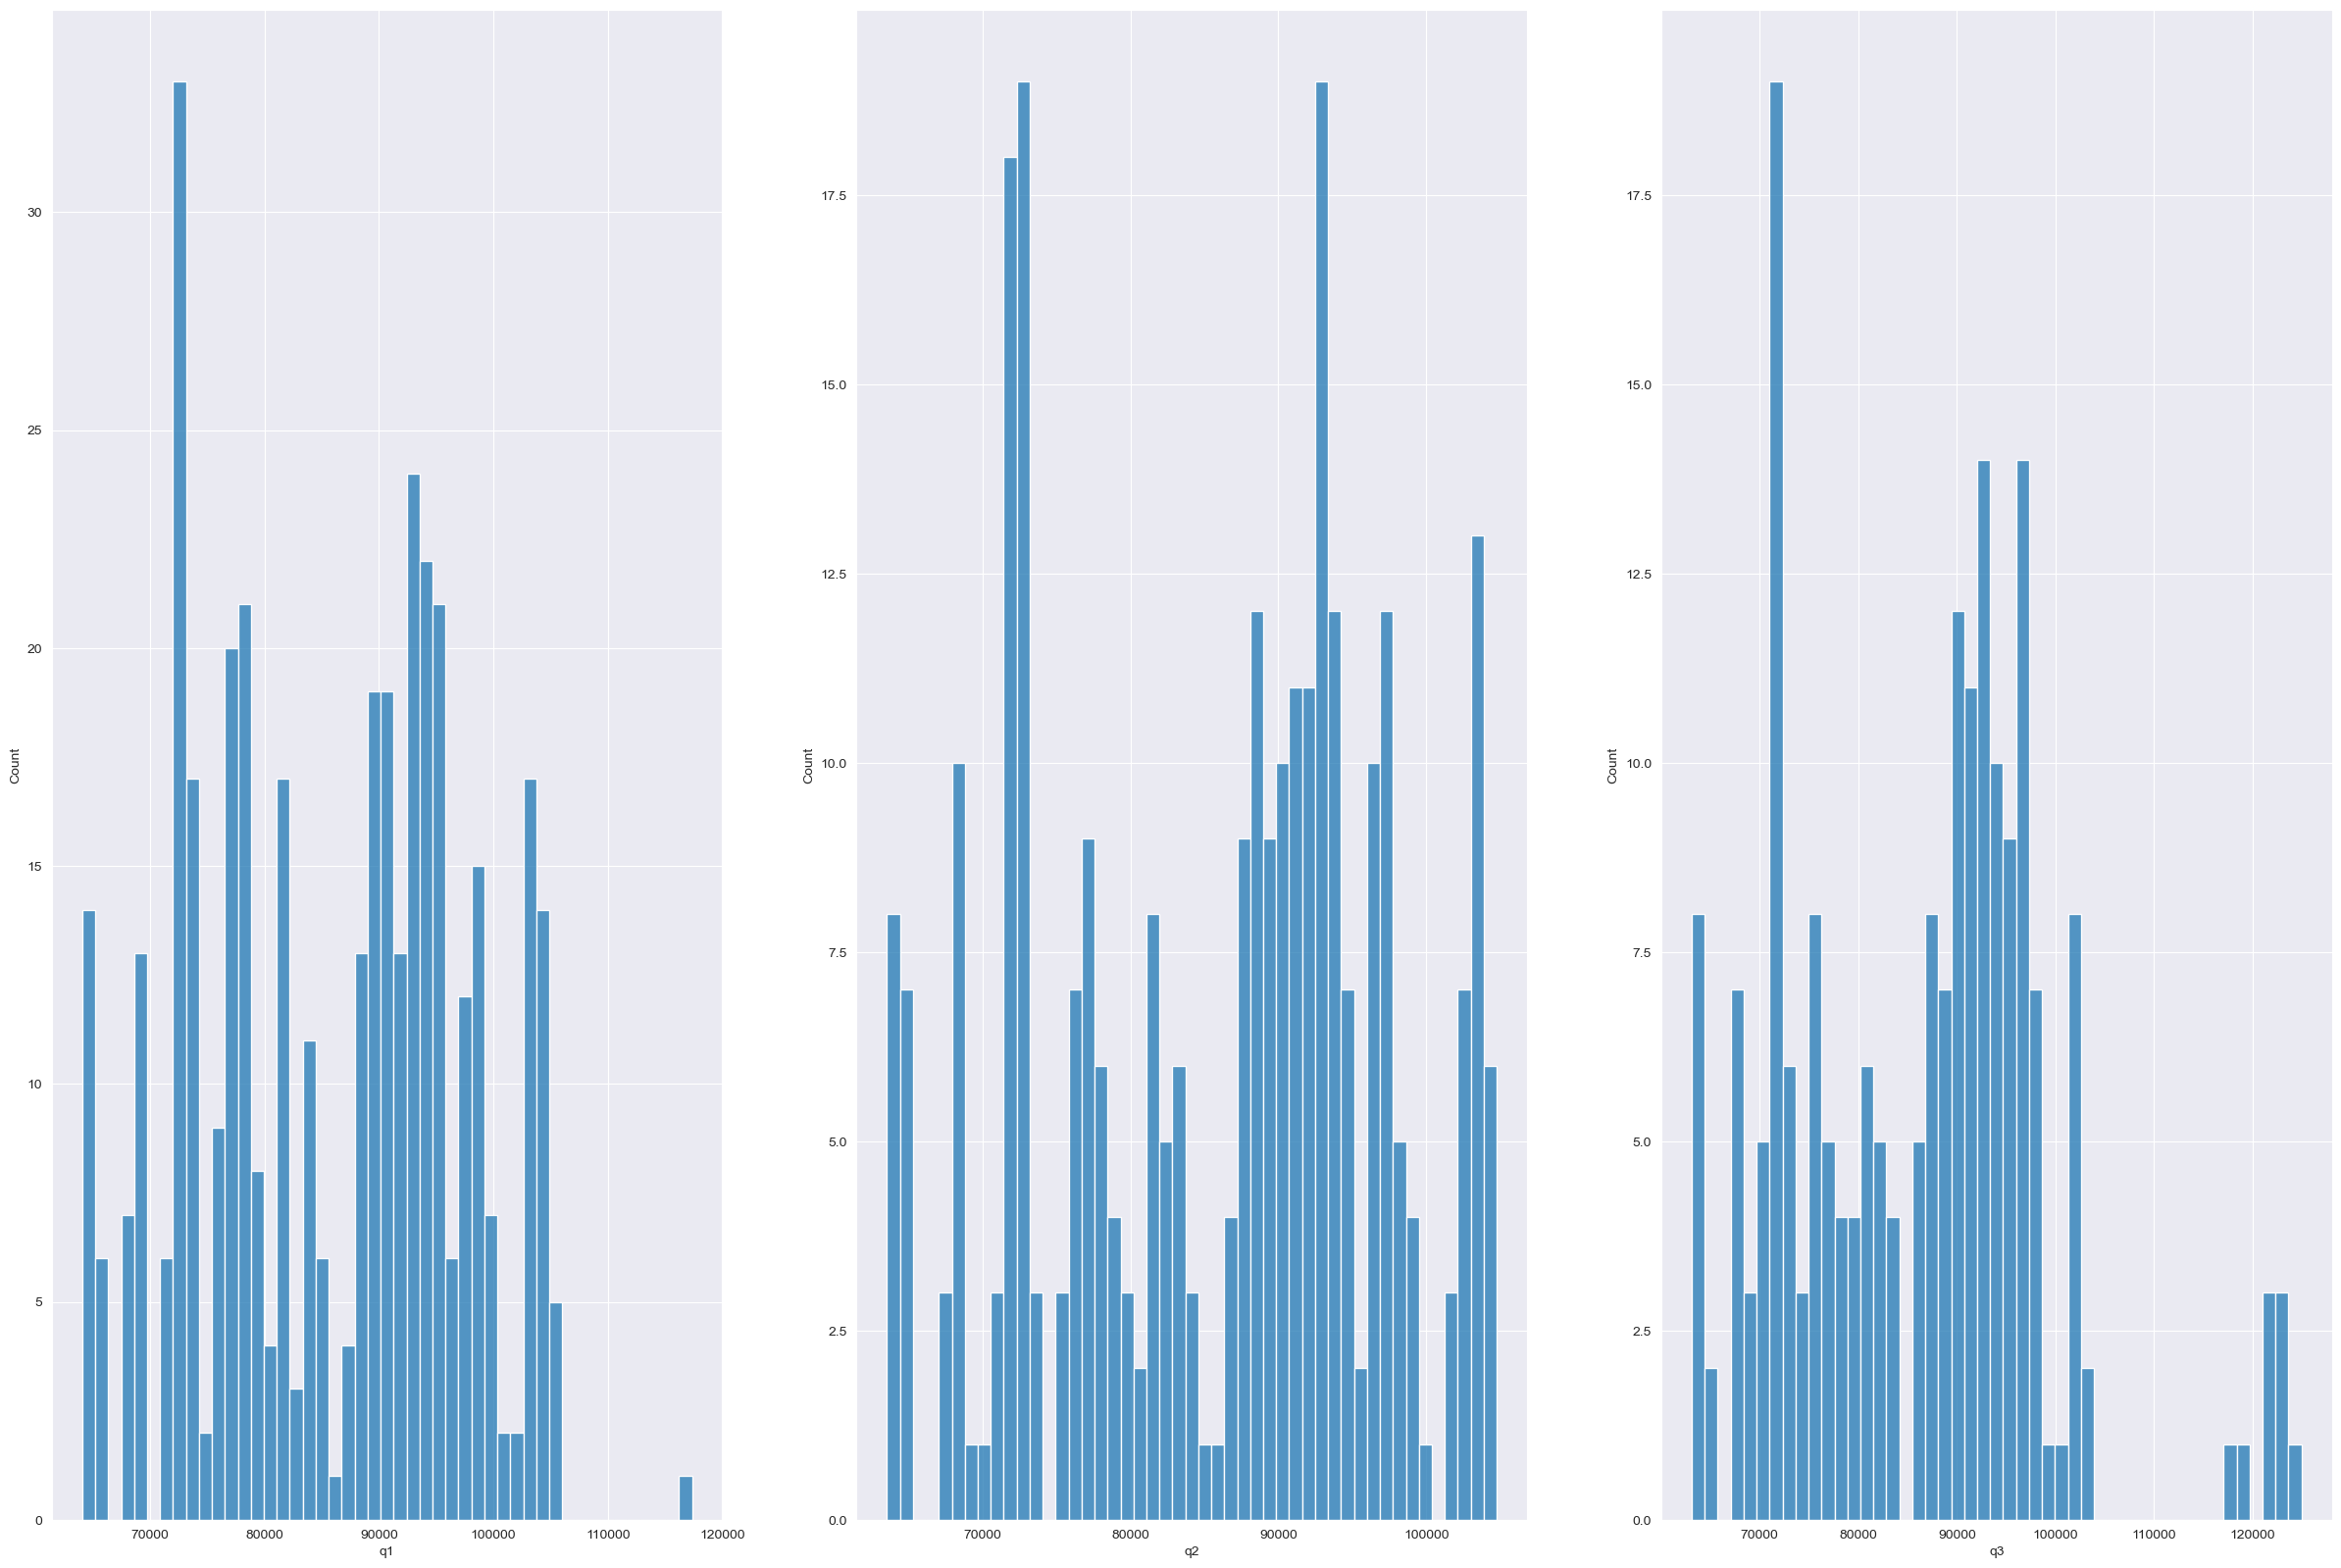

In [8]:
print(quali_data_2018_2023.describe())

# Histogram of Q1, Q2 and Q3 times to explore the distribution of the data
fig, axs = plt.subplots(1, 3, figsize=(30, 20))
sns.histplot(df_2018_quali['q1'], bins=47, ax=axs[0])
sns.histplot(df_2018_quali['q2'], bins=47, ax=axs[1])
sns.histplot(df_2018_quali['q3'], bins=47,ax=axs[2])

Based on the histograms, we can see the race data is not normally distributed across across the season.
The data seems to be multimodal, which suggests that there are distinct subgroups within the data.
The indication of distinct subgroups could be due to various factors llike skill, track conditions or strategy..


### Further investigation of histogram. Removing outliers and calculating the IQR for Q1, Q2 and Q3 times

##### Removing outliers, based on the histogram above 120,000 ms and below 54,000 ms. This gives a more accurate picture of the performances and a more accurate Standard Deviation

IQR_1 18301.5
IQR_2 19744.0
IQR_3 19744.0
75838.5  -  94140.0
73736.0  -  93480.0
73270.25  -  93475.25


C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Frequency')

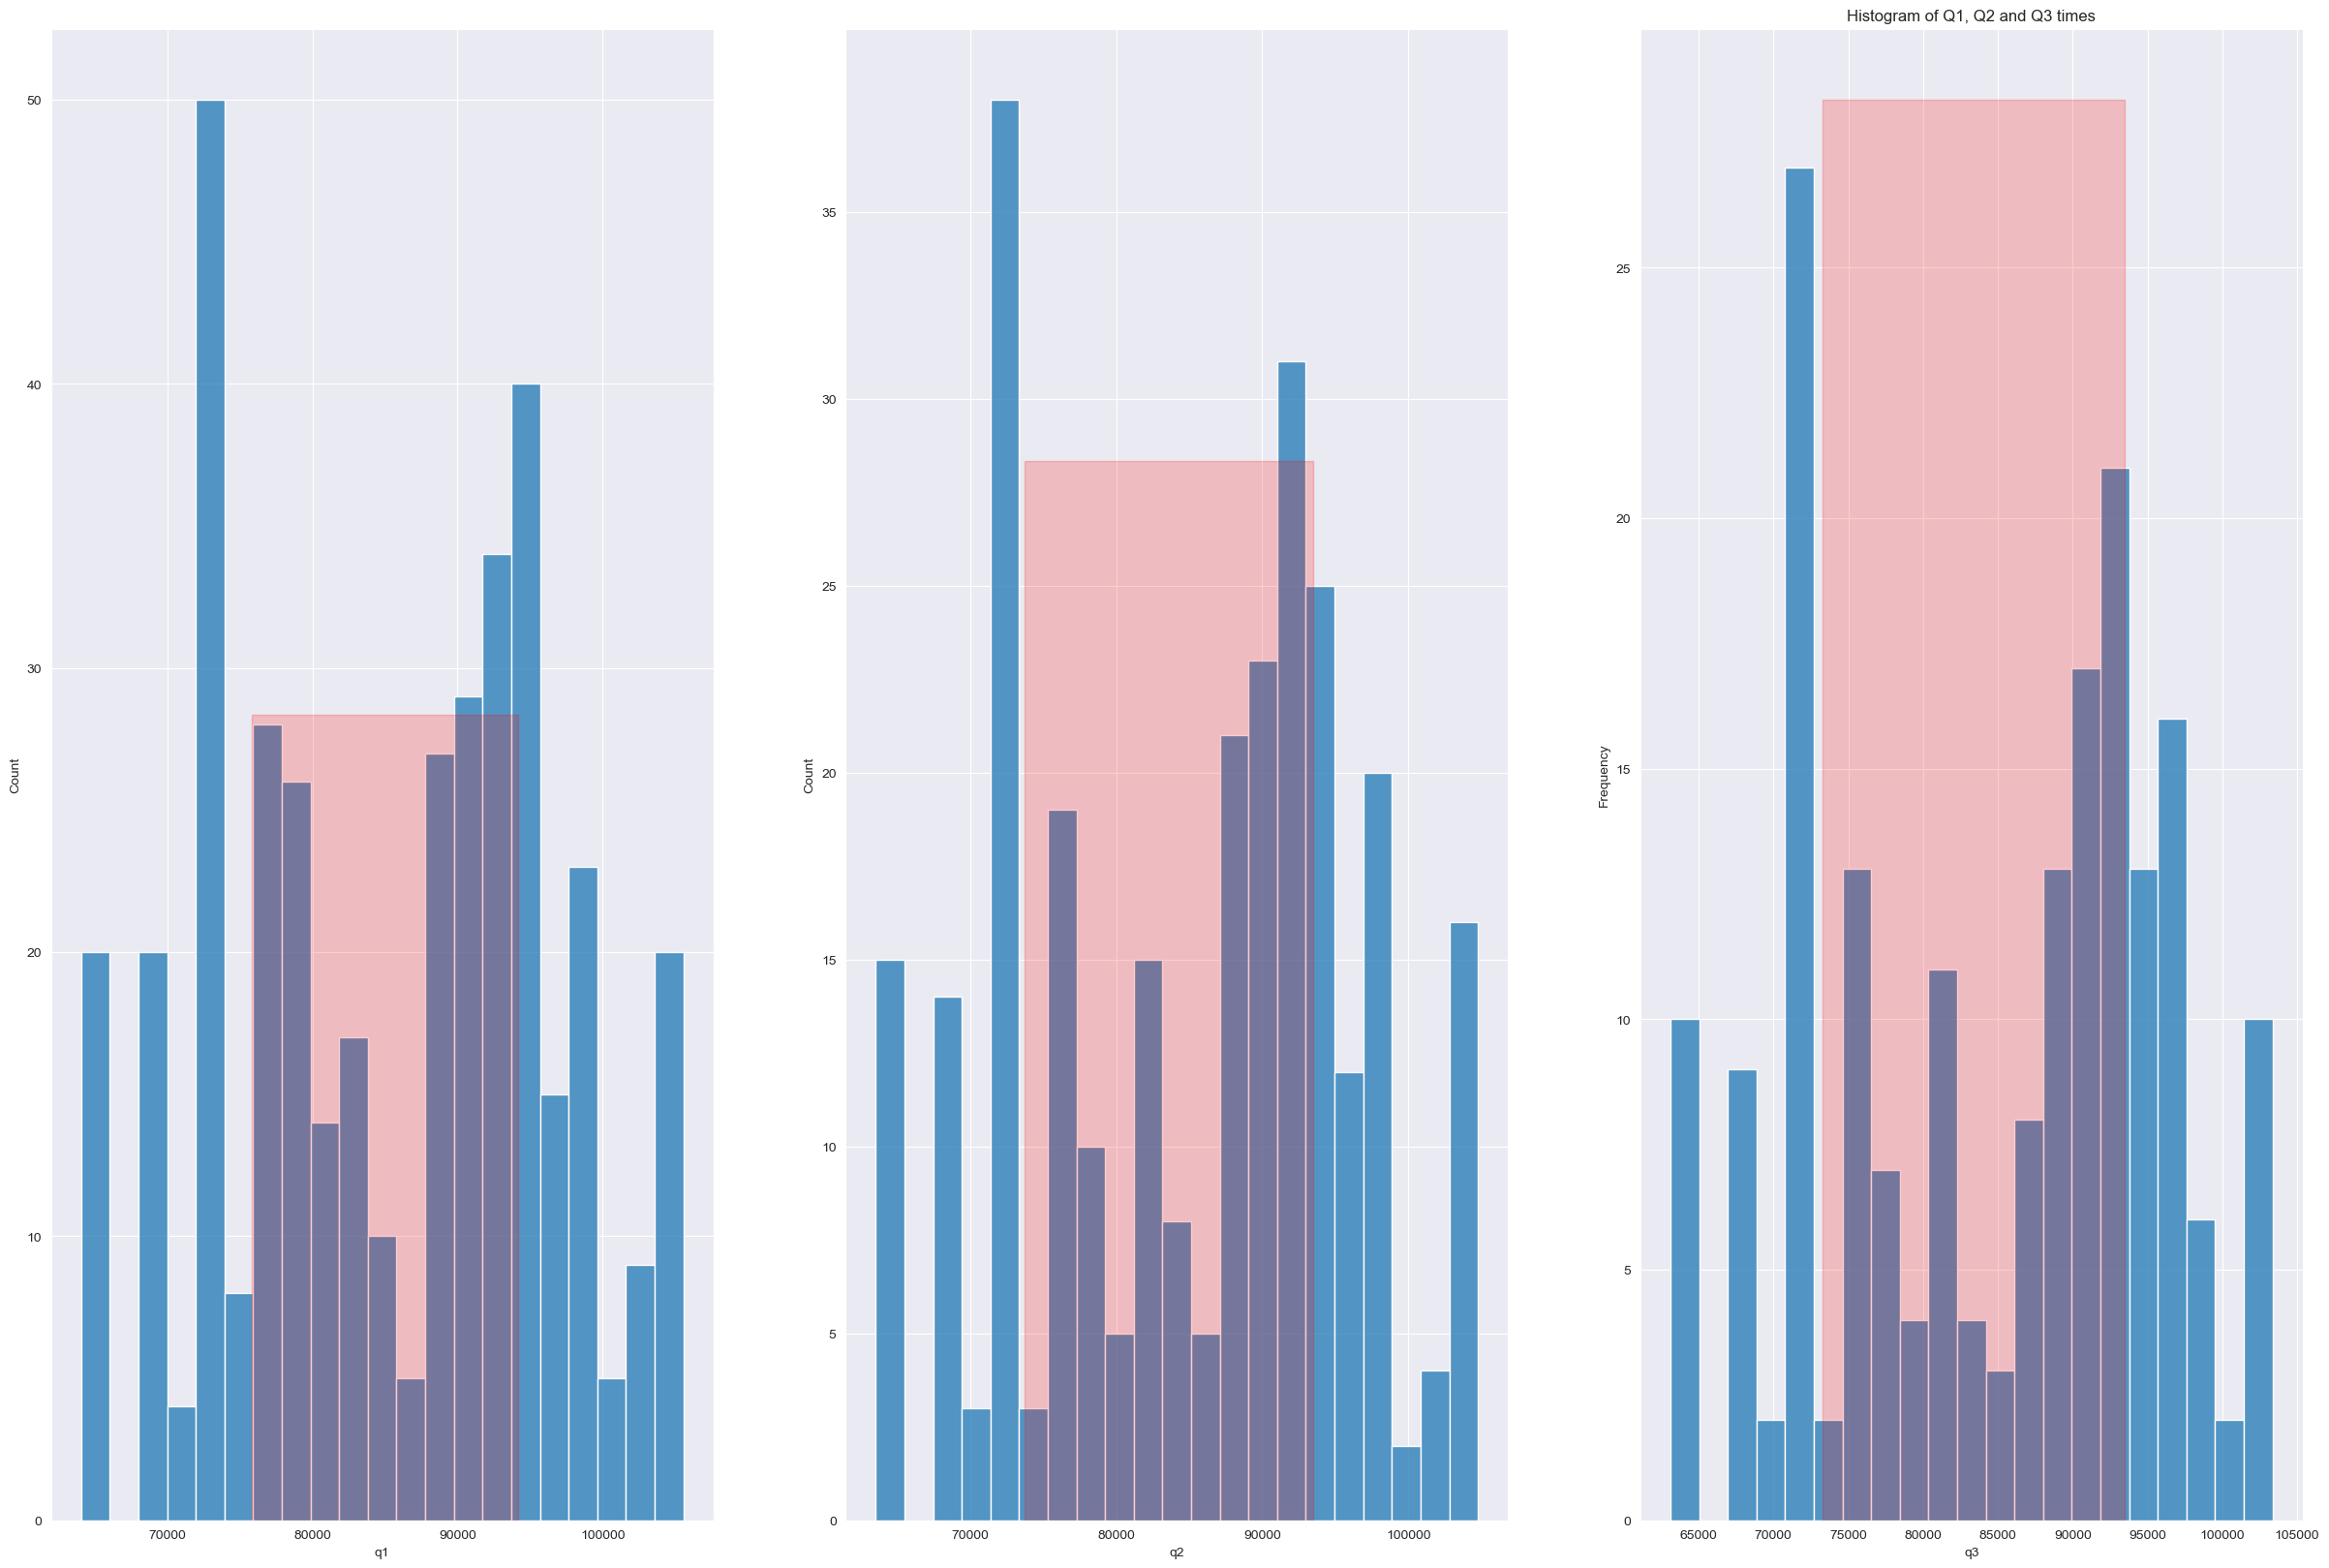

In [9]:
df_2018_quali = df_2018_quali[((df_2018_quali['q1'].isna()) | ((df_2018_quali['q1'] <= 106000) & (df_2018_quali['q1'] >= 53000))) &
                              ((df_2018_quali['q2'].isna()) | ((df_2018_quali['q2'] <= 106000) & (df_2018_quali['q2'] >= 53000))) &
                              ((df_2018_quali['q3'].isna()) | ((df_2018_quali['q3'] <= 106000) & (df_2018_quali['q3'] >= 53000)))]
df_2018_quali = df_2018_quali[(df_2018_quali['driverId'] != 850) & (df_2018_quali['driverId'] != 851)]

fig, axs = plt.subplots(1, 3, figsize=(30, 20))
sns.histplot(df_2018_quali['q1'], bins=21, ax=axs[0])
sns.histplot(df_2018_quali['q2'], bins=21, ax=axs[1])
sns.histplot(df_2018_quali['q3'], bins=21, ax=axs[2])

# Calculating the IQR for Q1, Q2 and Q3 times
Q1R1_q1 = df_2018_quali['q1'].quantile(0.25)
Q1R1_q3 = df_2018_quali['q1'].quantile(0.75)
iqr_1 = Q1R1_q3 - Q1R1_q1

Q1R2_q1 = df_2018_quali['q2'].quantile(0.25)
Q1R2_q3 = df_2018_quali['q2'].quantile(0.75)
iqr_2 = Q1R2_q3 - Q1R2_q1

Q1R3_q1 = df_2018_quali['q3'].quantile(0.25)
Q1R3_q3 = df_2018_quali['q3'].quantile(0.75)
iqr_3 = Q1R2_q3 - Q1R2_q1

print('IQR_1', iqr_1)
print('IQR_2', iqr_2)
print('IQR_3', iqr_3)
print(Q1R1_q1, ' - ', Q1R1_q3)
print(Q1R2_q1, ' - ', Q1R2_q3)
print(Q1R3_q1, ' - ', Q1R3_q3)


# Adding the IQR to the histograms
axs[0].fill_betweenx([0, plt.gca().get_ylim()[1]], Q1R1_q1, Q1R1_q3, color='red', alpha=0.2)
axs[1].fill_betweenx([0, plt.gca().get_ylim()[1]], Q1R2_q1, Q1R2_q3, color='red', alpha=0.2)
axs[2].fill_betweenx([0, plt.gca().get_ylim()[1]], Q1R3_q1, Q1R3_q3, color='red', alpha=0.2)

plt.title('Histogram of Q1, Q2 and Q3 times')
plt.ylabel('Frequency')

The IQR for Q1, Q2 and Q3 are 18,3ms 19.7ms and 19.7ms respectively.

The Historgram for Q1 shows that the inter quartile range (IQR) which represents 50% of Q1 lap times, falls between 75,835 and 94,140
milliseconds.
This suggests, that a significant portion of drivers across the grid exhibit similar performance within this range, with half their laps in this range.

18+ seconds are quite significant in Formula One, where the difference between pole position and 10th place can be less than a second. Due to the
fact
that we are looking at the whole season, we cant include weather conditions, track conditions, car performance etc., which can explain the high IQR.

The STD is 11.37 seconds, which is also quite high. This shows us, that on average the individual lap times deviate from the mean by 11.37 seconds.
Again a significant amount of time in Formula One. The high STD can also be explained by the fact we are looking at the whole season.

Taking into consideration we are looking at a whole season, we can still gain insights into the performance of the drivers and the grid as a whole.

E.g.: 
- Q1 Shows the widest range of lap times, with some slow outliers. This can be due to warm-up laps, traffic or other factors.
- Q2 and Q3 show a more narrow range of lap times, which is expected, as the drivers are pushing for the best possible lap times. 
- Q2 and Q3 are more competitive, with the fastest drivers in the grid competing for the top positions.

#### To gain insights into the subgroups, we can use clustering techniques to group the drivers based on their Q1, Q2 and Q3 times.
##### First we will collect all the data for driver qualifying times in 2018 and make a categorial variable for the drivers.

In [10]:
driver_quali_times = df_2018_quali.groupby('driverId')[['driverId', 'raceId', 'q1', 'q2', 'q3']].apply(lambda x: x)
driver_quali_times['driverId_cat'] = pd.Categorical(driver_quali_times['driverId']).codes

##### Then we will calculate the mean and standard deviation for Q1, Q2 and Q3 times and plotting the data in a scatterplot
The scatterplot shows the distribution of the data and the mean for each Q1, Q2 and Q3 times.
This visualises each drivers performance across the season and allows for a comparison of the drivers.
Note: There i no mode in the data, being that no lap time is repeated. - The data is amodal. '''

989 83987.2
Mean Q1: 85268.9405940594
Median Q1: 87755.5
Std Deviation Q1: 11179.564385190328
Standard Error: 556.2041166805725
Mean Q2: 85055.3875432526
Median Q2: 88139.0
Std Deviation Q2: 11174.264520694656
Standard Error: 657.309677687921
Mean Q3: 84524.48484848485
Median Q3: 87918.5
Std Deviation Q3: 11142.74342807148
Standard Error: 791.8802936772033


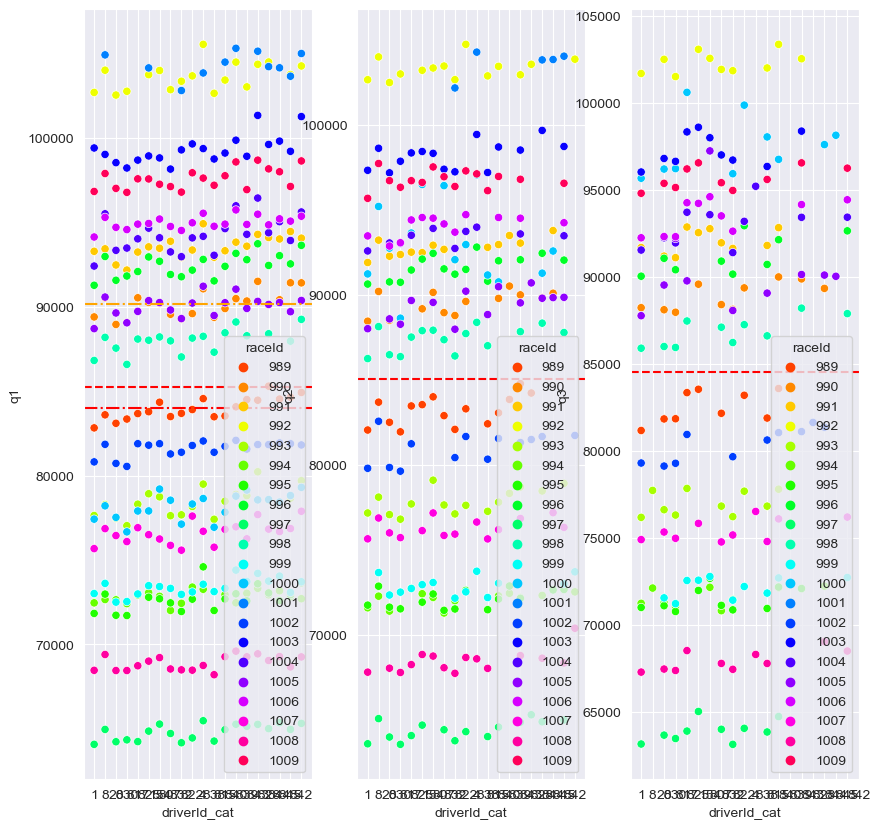

In [12]:
race_989 = df_2018_quali[df_2018_quali['raceId'] == 989]
race_990 = df_2018_quali[df_2018_quali['raceId'] == 990]
mean_990 = race_990['q1'].mean()
mean_989 = race_989['q1'].mean()
print('989', mean_989)


mean_q1 = df_2018_quali['q1'].mean()
print('Mean Q1:', mean_q1)
median_q1 = df_2018_quali['q1'].median()
print('Median Q1:', median_q1)
std_deviation_q1 = df_2018_quali['q1'].std()
print('Std Deviation Q1:', std_deviation_q1)
standard_error_q1 = df_2018_quali['q1'].sem()
print('Standard Error:', standard_error_q1)


mean_q2 = df_2018_quali['q2'].mean()
print('Mean Q2:', mean_q2)
median_q2 = df_2018_quali['q2'].median()
print('Median Q2:', median_q2)
std_deviation_q2 = df_2018_quali['q2'].std()
print('Std Deviation Q2:', std_deviation_q2)
standard_error_q2 = df_2018_quali['q2'].sem()
print('Standard Error:', standard_error_q2)


mean_q3 = df_2018_quali['q3'].mean()
print('Mean Q3:', mean_q3)
median_q3 = df_2018_quali['q3'].median()
print('Median Q3:', median_q3)
std_deviation_q3 = df_2018_quali['q3'].std()
print('Std Deviation Q3:', std_deviation_q3)
standard_error_q3 = df_2018_quali['q3'].sem()
print('Standard Error:', standard_error_q3)

race_ids = df_2018_quali['raceId'].unique()
driver_ids = df_2018_quali['driverId'].unique()
colors = sns.color_palette('hsv', len(race_ids))
color_map1 = dict(zip(race_ids, colors))
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

sns.scatterplot(x='driverId_cat', y='q1', data=driver_quali_times, ax=axs[0], hue='raceId', palette=color_map1)
sns.scatterplot(x='driverId_cat', y='q2', data=driver_quali_times, ax=axs[1], hue='raceId', palette=color_map1)
sns.scatterplot(x='driverId_cat', y='q3', data=driver_quali_times, ax=axs[2], hue='raceId', palette=color_map1)

axs[0].axhline(y=mean_q1, color='r', linestyle='--')
axs[0].axhline(y=mean_989, color='r', linestyle='-.')
axs[0].axhline(y=mean_990, color='orange', linestyle='-.')
axs[1].axhline(y=mean_q2, color='r', linestyle='--')
axs[2].axhline(y=mean_q3, color='r', linestyle='--')

for ax in axs:
    ax.set_xticks(range(len(driver_ids)))
    ax.set_xticklabels(driver_ids)
#plt.xticks(range(len(driver_ids)), driver_ids)
plt.show()

Dropping the few NaN values from Q1 being they are of no significance to the analysis.

In [13]:
df_2018_quali = df_2018_quali.dropna(subset=['q1'])

### Applying Kernel Density Estimation to the Q1 times to find the local maxima and see if we can identify the subgroups through the peaks in the KDE.

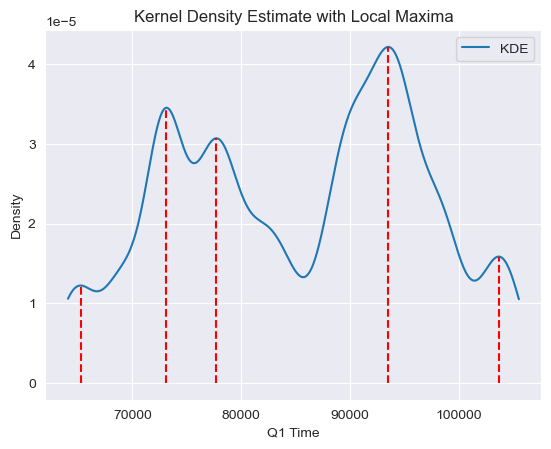

In [14]:
df_2018_quali['q1'] = pd.to_numeric(df_2018_quali['q1'], errors='coerce')

# Calculate the KDE
kde = gaussian_kde(df_2018_quali['q1'])
kde.set_bandwidth(bw_method=kde.factor / 2)
x = np.linspace(df_2018_quali['q1'].min(), df_2018_quali['q1'].max(), 1000)

# Find the local maxima
local_maxima = argrelextrema(kde(x), np.greater)

# Plot the KDE
plt.plot(x, kde(x), label='KDE')

# Mark the local maxima
for maxima_index in local_maxima[0]:
    maxima = x[maxima_index]
    plt.plot([maxima, maxima], [0, kde([maxima])[0]], 'r--')

plt.title('Kernel Density Estimate with Local Maxima')
plt.xlabel('Q1 Time')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plot shows that there are 5 distinct peaks in the data, which suggests that there are 5 underlying clusters/groups.

### Applying GMM Gaussian Mixture Model to the Q1 times to identify the subgroups (Clusters)
The means, variances and weights of the GMM model will give us insights into the subgroups within the data. The ranges are quite wide, which suggests there are very different performances within the data. This could be due to the fact that we are looking at the whole season, where different factors can influence the lap times

In [15]:
gmm = GaussianMixture(n_components=10)
reshape = np.reshape(df_2018_quali['q1'].values, (-1, 1))
gmm.fit(reshape)

means = gmm.means_
variances = gmm.covariances_
weights = gmm.weights_

print('Means:', means)
print('Variances:', variances)
print('Weights:', weights)

# Testing for the optimal number of components - According to BIC and AIC the optimal number of components is 10.
# The BIC and AIC values are the lowest for 10 components, but knowing the data, we can see that 10 components is too few.
'''for i in range(1, gmm.n_components+1):
    gmm = GaussianMixture(n_components=i)
    reshape = np.reshape(df_2018_quali['q1'].values, (-1, 1))
    gmm.fit(reshape)
    bic =  gmm.bic(reshape)
    print('BIC for: ', i, ' components ',  bic)
    aic = gmm.aic(reshape)
    print('AIC for : ',i , ' components ' , aic)'''

Means: [[ 92793.85898503]
 [ 72968.55641766]
 [ 98246.17361061]
 [ 82740.27954805]
 [ 64820.9       ]
 [103789.07713346]
 [ 89486.90846135]
 [ 77675.46905539]
 [ 94595.13114923]
 [ 68901.34994691]]
Variances: [[[ 740444.74815562]]

 [[ 360697.6935162 ]]

 [[1168490.06942964]]

 [[2180011.09249469]]

 [[ 205183.69000268]]

 [[ 951227.18823353]]

 [[1534372.44136884]]

 [[1253546.55662667]]

 [[ 510219.74542892]]

 [[ 168185.40578297]]]
Weights: [0.09079259 0.14234457 0.0992673  0.10288356 0.04950495 0.07515686
 0.14242874 0.14447522 0.10364126 0.04950495]


C:\Users\havva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



"for i in range(1, gmm.n_components+1):\n    gmm = GaussianMixture(n_components=i)\n    reshape = np.reshape(df_2018_quali['q1'].values, (-1, 1))\n    gmm.fit(reshape)\n    bic =  gmm.bic(reshape)\n    print('BIC for: ', i, ' components ',  bic)\n    aic = gmm.aic(reshape)\n    print('AIC for : ',i , ' components ' , aic)"

##### The GMM components are plotted on top of the KDE plot or histogram to show the distribution of the data and the components.
Again we see that the data is not normally distributed and that there are distinct subgroups in the data.

Based on a visual inspection, there seem to be around 5 subgroups in the data, which can be further analysed using clustering techniques.

There is less probability of the data being in that range where the curve is low. This is expected as the curve is low around the fastest and slowest speeds. This is because there are fewer drivers in these ranges.

C:\Users\havva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



10


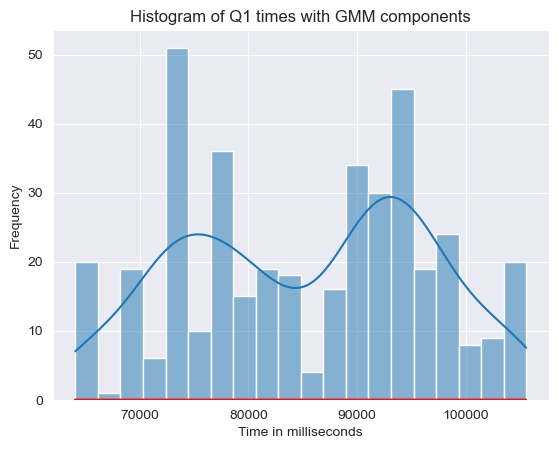

In [16]:
from scipy.stats import norm
# Generate the KDE plot or histogram. Bins set by Squareroot of the number of data points
sns.histplot(df_2018_quali['q1'], bins=20, kde=True)

# For each component in the GMM
print(gmm.n_components)
for i in range(gmm.n_components):
    # Generate a Gaussian distribution using the mean and variance of the component
    gauss = norm(loc=means[i][0], scale=np.sqrt(variances[i][0][0]))

    # Generate x values
    x = np.linspace(df_2018_quali['q1'].min(), df_2018_quali['q1'].max(), 1000)

    # Plot the Gaussian distribution
    plt.plot(x, weights[i] * gauss.pdf(x), 'r')

plt.title('Histogram of Q1 times with GMM components')
plt.xlabel('Time in milliseconds')
plt.ylabel('Frequency')
plt.show()

### K-MEANS Clustering
Identifying groups of drivers who perform similarly in the initial qualifying session.
Inspecting the clusters - starting with 10 clusters - we can quickly identify a pattern. 

The data seems to fit with the different tracks which is used in the season. Dividing them into 14 clusters, seems to fit well with the data. 


#### Scores for the K-Means clustering
###### The Silhouette Score, Calinski Harabasz Score and Davies Bouldin Score  are used to evaluate the clustering.

##### The Silhouette Score is above the threshold of 0.5, which is good.
---- Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher values (closer to 1) indicate better-defined clusters.

##### The Calinski Harabasz Score is also above the threshold of 1000, which is good. 
This indicates that the clusters are well separated and that the data fits well with the clusters.
---- Evaluates cluster validity by measuring the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate denser and more well-separated clusters.

##### The Davies Bouldin Score is also used to evaluate the clustering. The score is below 0.5, which is good. 
This indicates that the clusters are well separated and that the data fits well with the clusters.
---- Measures the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.

### Conclusion: 
The metrics seems to indicate that the clustering is good and that the data fits well with the clusters and each cluster cooresponds roughly to a different track.

Silhouette Score: 0.6039865329614135
Calinski Harabasz Score: 7855.318026220701
Davies Bouldin Score: 0.46552275688161865


C:\Users\havva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Text(0.5, 1.0, 'K-Means Clustering of Q1 and Q2 times')

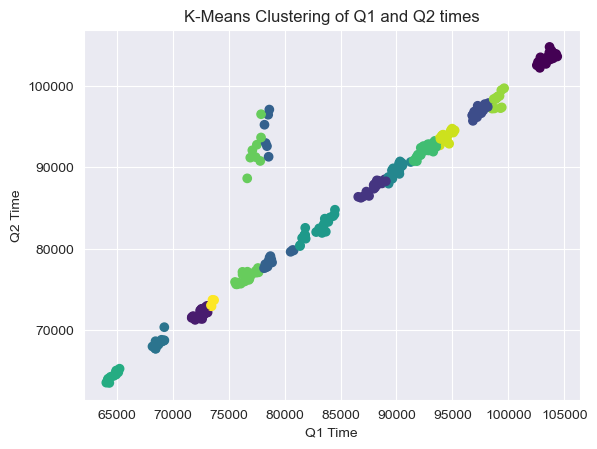

In [17]:
df_2018_quali = df_2018_quali.dropna(subset=['q1'])
kmeans = KMeans(n_clusters=14)
reshape = np.reshape(df_2018_quali['q1'].values, (-1, 1))
kmeans.fit(reshape)
df_2018_quali['cluster'] = kmeans.predict(reshape)

silhouette_avg = silhouette_score(reshape,df_2018_quali['cluster'])
print('Silhouette Score:', silhouette_avg)

chi_score = calinski_harabasz_score(reshape, df_2018_quali['cluster'])
print('Calinski Harabasz Score:', chi_score)

db_score = davies_bouldin_score(reshape, df_2018_quali['cluster'])
print('Davies Bouldin Score:', db_score)

# Plot the clusters
plt.scatter(df_2018_quali['q1'], df_2018_quali['q2'], c=df_2018_quali['cluster'], cmap='viridis')
plt.xlabel('Q1 Time')
plt.ylabel('Q2 Time')
plt.title('K-Means Clustering of Q1 and Q2 times')

## Interactive Plot

In [19]:
# Create a trace for the scatter plot
trace = go.Scatter(
    x = df_2018_quali['q1'],
    y = df_2018_quali['q2'],
    mode = 'markers',
    marker = dict(
        size = 10,
        color = df_2018_quali['cluster'], # set color equal to a variable
        colorscale = 'Viridis', # one of plotly colorscales
        showscale = True
    ),
    text = df_2018_quali.raceId.astype(str) + '<br>' + 'DriverID: '+  df_2018_quali.driverId.astype(str) # This will be displayed when you hover over a point
)

# Create a trace for the scatter plot for Q3
trace2 = go.Scatter(
    x = df_2018_quali['q1'],
    y = df_2018_quali['q3'],
    mode = 'markers',
    marker = dict(
        size = 10,
        color = df_2018_quali['cluster'], # set color equal to a variable
        colorscale = 'Viridis', # one of plotly colorscales
        showscale = True
    ),
    text = df_2018_quali.raceId.astype(str) + '<br>' + 'DriverID: ' + df_2018_quali.driverId.astype(str) + '<br>' + 'Q3', # This will be displayed when you hover over a point
    name = 'Q1 vs Q3'
)

data = [trace, trace2]

# Create the layout
layout = go.Layout(
    title = 'K-Means Clustering of Q1 and Q2 times',
    xaxis = dict(title = 'Q1 Time'),
    yaxis = dict(title = 'Q2 and Q3 Time'),
    hovermode = 'closest'
)

# Create the figure and add the scatter plot
fig = go.Figure(data=data, layout=layout)

# Show the plot
pyo.plot(fig, filename='2018_quali_kmeans_clustering.html')

'2018_quali_kmeans_clustering.html'